# **1.Import the Dependencies**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras
from keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D,BatchNormalization
from keras.models import Sequential
import tensorflow_datasets as tfds
import os
from keras.preprocessing.image import array_to_img
from keras.callbacks import Callback

# ****2.Download the CIFAR10 dataset****

In [8]:
ds = tfds.load('cifar10', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.1DRBPD_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.1DRBPD_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


# ****3.Data visualization and data preprocessing****

In [9]:
dataiterator = ds.as_numpy_iterator()

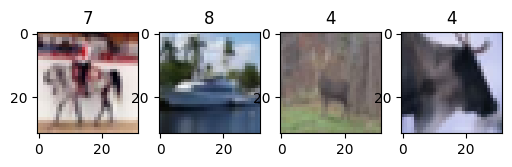

In [10]:
fig,ax = plt.subplots(ncols=4 ,figsize=(6,6) )

for i in range(4):
    sample = dataiterator.next()
    ax[i].imshow(sample['image'])
    ax[i].title.set_text(sample['label'])

In [11]:
# model preprocessing
def scale(img):
  img=(img['image'])
  return img/255

In [12]:
ds = tfds.load('cifar10', split='train')
ds = ds.map(scale)
ds = ds.cache()
ds = ds.shuffle(50000)
ds = ds.batch(128)
ds = ds.prefetch(64)   # helps for faster fetching of data

In [13]:
ds.as_numpy_iterator().next().shape

(128, 32, 32, 3)

# **4.Model creation**

In [14]:
def NN_generator():
    model = Sequential()

    model.add(Dense(8 * 8 * 256, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((8, 8, 256)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(3, 4, padding='same', activation='sigmoid')) # use of tanh takes more time to process but tend to work well in generator

    return model

In [15]:
generator = NN_generator()

In [16]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16384)          │     2,113,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 128)    │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,430,915 (13.09 MB)

 Trainable params: 3,430,915 (13.09 MB)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1734356498.703247     118 service.cc:145] XLA service 0x7cf73000e070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734356498.703296     118 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734356498.703300     118 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1734356501.213054     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


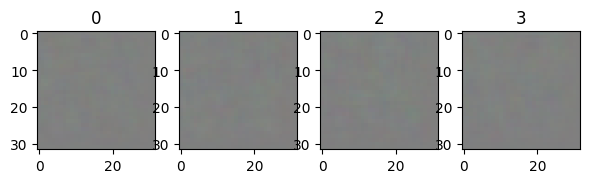

In [17]:
img = generator.predict(tf.random.normal((4, 128, 1)))

fig, ax = plt.subplots(ncols=4, figsize=(7, 7))

for idx, img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

plt.show()

In [18]:
def NN_discriminator():
    model = Sequential()

    model.add(Conv2D(32,4,strides=2, padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(64,4,strides=2,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128,4,strides=2,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, 4,strides=2,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [19]:
discriminator = NN_discriminator()

In [20]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 64)       │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,169 (2.64 MB)

 Trainable params: 691,169 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
img = img.reshape(1,32,32,3)

In [22]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


array([[0.5046955]], dtype=float32)

# **5.Define the Optimizer and the loss function**

In [23]:
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy as bc

In [24]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = bc()
d_loss = bc()

In [25]:
from keras.models import Model

In [26]:
class GAN(Model):
  def __init__(self,generator,discriminator,*args,**kwargs):
    super().__init__(*args,**kwargs)

    self.discriminator = discriminator
    self.generator = generator

  def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
    super().compile(*args,**kwargs)

    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):

    real_img = batch
    fake_img = self.generator(tf.random.normal((128,128,1)),training=False)

    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_img,training=True)
      yhat_fake = self.discriminator(fake_img,training=True)
      yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

      y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real,noise_fake],axis=0)

      tot_d_loss = self.d_loss(y_realfake,yhat_realfake)

      dgrad = d_tape.gradient(tot_d_loss,self.discriminator.trainable_variables)
      self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:
      gen_img = self.generator(tf.random.normal((128,128,1)),training=True)

      pred_labels = self.discriminator(gen_img,training=False)

      tot_g_loss = self.g_loss(tf.zeros_like(pred_labels),pred_labels)

      ggrad = g_tape.gradient(tot_g_loss,self.generator.trainable_variables)
      self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

    return {"d_loss":tot_d_loss,"g_loss":tot_g_loss}

In [27]:
gan = GAN(generator,discriminator)

In [28]:
gan.compile(g_opt,d_opt,g_loss,d_loss)

# 6. **use Callback** to store the image produces during each epocs

In [31]:
class ModelMonitor(Callback):
    def __init__(self, num_img=2, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join("/kaggle/working/TheCreatedFolder", f'generated_img_{epoch}_{i}.png'))

In [42]:
hist = gan.fit(ds, epochs=40,callbacks=[ModelMonitor()])

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 112s 286ms/step - d_loss: 0.6944 - g_loss: 0.6801
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6931 - g_loss: 0.6830
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6938 - g_loss: 0.6813
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6950 - g_loss: 0.6810
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6942 - g_loss: 0.6829
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6942 - g_loss: 0.6850
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6938 - g_loss: 0.6849
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6938 - g_loss: 0.6862
Epoch 9/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6938 - g_loss: 0.6871
Epoch 10/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6936 - g_loss: 0.6858
Epoch 11/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 282ms/step - d_loss: 0.6938 - g_loss: 0.6857
Epoch 12

In [43]:
import shutil
shutil.make_archive('/kaggle/working/TheCreatedFolder.zip', 'zip', '/kaggle/working', 'TheCreatedFolder')

'/kaggle/working/TheCreatedFolder.zip.zip'

# **7.Performance**

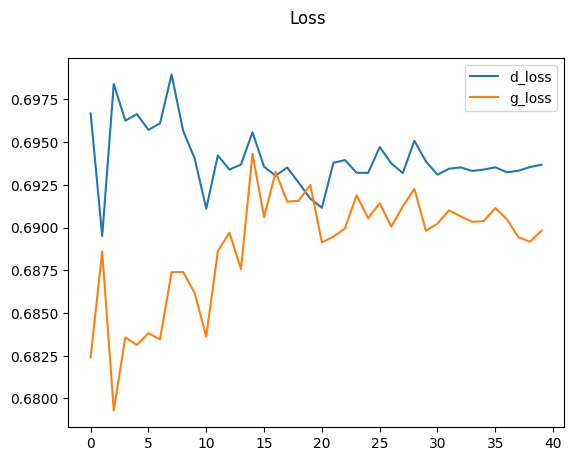

In [44]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# **8.Save the models**

In [39]:
generator.save("generator.h5")
discriminator.save("discriminator.h5")

os.makedirs('/kaggle/working/TheCreatedFolder')

os.remove("/kaggle/working/generator.h5")